# LAB 7

## STEP 1 

In [4]:
import psycopg2
from psycopg2 import sql
user = "postgres"
password = "Duke#7539"
host = "localhost"
port = 5432
connection = psycopg2.connect(user=user, password=password, host=host, port=port)
connection.set_isolation_level(0)
cursor = connection.cursor()
create_db_query = sql.SQL("CREATE DATABASE {}").format(sql.Identifier("world_data"))
cursor.execute(create_db_query)
cursor.close()
connection.close()

print("Database 'world_data' created successfully.")


Database 'world_data' created successfully.


In [6]:
import psycopg2

user = "postgres"
password = "Duke#7539"
host = "localhost"
port = 5432
database = "world_data"

connection = psycopg2.connect(user=user, password=password, host=host, port=port, database=database)
cursor = connection.cursor()

create_population_table = """
CREATE TABLE Population (
    Country_name VARCHAR(255),
    Total_Population BIGINT,
    Last_Updated_Year INT
);
"""

create_gdp_table = """
CREATE TABLE Gross_Domestic_Product (
    Last_Updated DATE,
    Total_GDP NUMERIC(20, 2)
);
"""

create_gni_table = """
CREATE TABLE Gross_National_Income (
    Last_Updated DATE,
    Total_GNI NUMERIC(20, 2)
);
"""

create_inflation_table = """
CREATE TABLE Inflation_Rates (
    Current_Inflation_Rates NUMERIC(10, 2),
    Last_Updated DATE
);
"""

cursor.execute(create_population_table)
cursor.execute(create_gdp_table)
cursor.execute(create_gni_table)
cursor.execute(create_inflation_table)

connection.commit()

print("Tables created successfully.")

cursor.close()
connection.close()


Tables created successfully.


## STEP 2

### POPULATION TABLE

In [10]:
import requests
import psycopg2
from psycopg2 import sql

def get_country_population(country_codes):
    base_url = "http://api.worldbank.org/v2/country"
    format_url = "?format=json"

    # Set up the request headers
    headers = {
        'Content-Type': 'application/json',
    }

    # Database credentials
    db_user = "postgres"
    db_password = "Duke#7539"
    db_host = "localhost"
    db_port = 5432
    db_name = "world_data"

    # Establish a connection to the PostgreSQL server
    connection = psycopg2.connect(user=db_user, password=db_password, host=db_host, port=db_port, database=db_name)

    try:
        for code in country_codes:
            url = f"{base_url}/{code}/indicator/SP.POP.TOTL{format_url}"

            # Make the API request
            response = requests.get(url, headers=headers)

            # Check if the request was successful (status code 200)
            if response.status_code == 200:
                # Parse the response to extract total population and last updated year
                data = response.json()
                if len(data) > 1 and len(data[1]) > 0:
                    total_population = data[1][0]['value']
                    last_updated_year = data[1][0]['date']

                    # Insert data into the Population table
                    insert_query = sql.SQL("""
                        INSERT INTO Population (Country_name, Total_Population, Last_Updated_Year)
                        VALUES ({}, {}, {});
                    """).format(sql.Literal(code), sql.Literal(total_population), sql.Literal(last_updated_year))

                    # Create a cursor object to interact with the database
                    cursor = connection.cursor()

                    # Execute the SQL statement to insert data
                    cursor.execute(insert_query)

                    # Commit the changes
                    connection.commit()

                    # Close the cursor
                    cursor.close()

                    print(f"Data for country code {code} inserted successfully.")
                else:
                    print(f"No data available for country code {code}")
            else:
                print(f"Error for country code {code}: {response.status_code} - {response.text}")

    except requests.RequestException as e:
        print(f"Request error: {e}")

    finally:
        # Close the connection
        if connection:
            connection.close()

if __name__ == "__main__":
    # List of country codes for India, US, Canada, UK, and Colombia
    countries = ['IND', 'USA', 'CAN', 'GBR', 'COL']
    get_country_population(countries)


Data for country code IND inserted successfully.
Data for country code USA inserted successfully.
Data for country code CAN inserted successfully.
Data for country code GBR inserted successfully.
Data for country code COL inserted successfully.


### Gross Domestic product table

In [14]:
import requests
import psycopg2
from psycopg2 import sql

def get_country_gdp(country_codes):
    base_url = "http://api.worldbank.org/v2/country"
    indicator_code = "NY.GDP.MKTP.CD"  # Indicator code for Total GDP
    format_url = "?format=json"

    # Set up the request headers
    headers = {
        'Content-Type': 'application/json',
    }

    # Database credentials
    db_user = "postgres"
    db_password = "Duke#7539"
    db_host = "localhost"
    db_port = 5432
    db_name = "world_data"

    # Establish a connection to the PostgreSQL server
    connection = psycopg2.connect(user=db_user, password=db_password, host=db_host, port=db_port, database=db_name)

    try:
        for code in country_codes:
            url = f"{base_url}/{code}/indicator/{indicator_code}{format_url}"

            # Make the API request
            response = requests.get(url, headers=headers)

            # Check if the request was successful (status code 200)
            if response.status_code == 200:
                # Parse the response to extract total GDP and last updated year
                data = response.json()
                if len(data) > 1 and len(data[1]) > 0:
                    total_gdp = data[1][0]['value']
                    last_updated_year = data[1][0]['date']

                    # Insert data into the Gross_Domestic_Product table
                    insert_query = sql.SQL("""
                        INSERT INTO Gross_Domestic_Product (Last_Updated, Total_GDP)
                        VALUES ({}, {});
                    """).format(sql.Literal(last_updated_year), sql.Literal(total_gdp))

                    # Create a cursor object to interact with the database
                    cursor = connection.cursor()

                    # Execute the SQL statement to insert data
                    cursor.execute(insert_query)

                    # Commit the changes
                    connection.commit()

                    # Close the cursor
                    cursor.close()

                    print(f"Data for country code {code} inserted successfully.")
                else:
                    print(f"No data available for country code {code}")
            else:
                print(f"Error for country code {code}: {response.status_code} - {response.text}")

    except requests.RequestException as e:
        print(f"Request error: {e}")

    finally:
        # Close the connection
        if connection:
            connection.close()

if __name__ == "__main__":
    # List of country codes for India, US, Canada, UK, and Colombia
    countries = ['IND', 'USA', 'CAN', 'GBR', 'COL']
    get_country_gdp(countries)


Data for country code IND inserted successfully.
Data for country code USA inserted successfully.
Data for country code CAN inserted successfully.
Data for country code GBR inserted successfully.
Data for country code COL inserted successfully.


### Inflation Rates

In [17]:
import requests
import psycopg2
from psycopg2 import sql

def get_country_inflation(country_codes):
    base_url = "http://api.worldbank.org/v2/country"
    indicator_code = "FP.CPI.TOTL.ZG"  # Indicator code for Current Inflation Rate
    format_url = "?format=json"

    # Set up the request headers
    headers = {
        'Content-Type': 'application/json',
    }

    # Database credentials
    db_user = "postgres"
    db_password = "Duke#7539"
    db_host = "localhost"
    db_port = 5432
    db_name = "world_data"

    # Establish a connection to the PostgreSQL server
    connection = psycopg2.connect(user=db_user, password=db_password, host=db_host, port=db_port, database=db_name)

    try:
        for code in country_codes:
            url = f"{base_url}/{code}/indicator/{indicator_code}{format_url}"

            # Make the API request
            response = requests.get(url, headers=headers)

            # Check if the request was successful (status code 200)
            if response.status_code == 200:
                # Parse the response to extract current inflation rate and last updated year
                data = response.json()
                if len(data) > 1 and len(data[1]) > 0:
                    current_inflation_rate = data[1][0]['value']
                    last_updated_year = data[1][0]['date']

                    # Insert data into the Inflation_Rates table
                    insert_query = sql.SQL("""
                        INSERT INTO Inflation_Rates (Current_Inflation_Rates, Last_Updated)
                        VALUES ({}, {});
                    """).format(sql.Literal(current_inflation_rate), sql.Literal(last_updated_year))

                    # Create a cursor object to interact with the database
                    cursor = connection.cursor()

                    # Execute the SQL statement to insert data
                    cursor.execute(insert_query)

                    # Commit the changes
                    connection.commit()

                    # Close the cursor
                    cursor.close()

                    print(f"Data for country code {code} inserted successfully.")
                else:
                    print(f"No data available for country code {code}")
            else:
                print(f"Error for country code {code}: {response.status_code} - {response.text}")

    except requests.RequestException as e:
        print(f"Request error: {e}")

    finally:
        # Close the connection
        if connection:
            connection.close()

if __name__ == "__main__":
    # List of country codes for India, US, Canada, UK, and Colombia
    countries = ['IND', 'USA', 'CAN', 'GBR', 'COL']
    get_country_inflation(countries)


Data for country code IND inserted successfully.
Data for country code USA inserted successfully.
Data for country code CAN inserted successfully.
Data for country code GBR inserted successfully.
Data for country code COL inserted successfully.


### Gross National Income

In [21]:
import requests
import psycopg2
from psycopg2 import sql

def insert_gni_into_database(country_codes):
    base_url = "http://api.worldbank.org/v2/country"
    indicator_code = "NY.GNP.MKTP.CD"  # Indicator code for Total GNI
    format_url = "?format=json"

    # Set up the request headers
    headers = {
        'Content-Type': 'application/json',
    }

    # Database credentials
    db_user = "postgres"
    db_password = "Duke#7539"
    db_host = "localhost"
    db_port = 5432
    db_name = "world_data"

    # Establish a connection to the PostgreSQL server
    connection = psycopg2.connect(user=db_user, password=db_password, host=db_host, port=db_port, database=db_name)

    try:
        for code in country_codes:
            url = f"{base_url}/{code}/indicator/{indicator_code}{format_url}"

            # Make the API request
            response = requests.get(url, headers=headers)

            # Check if the request was successful (status code 200)
            if response.status_code == 200:
                # Parse the response to extract total GNI and last updated year
                data = response.json()
                if len(data) > 1 and len(data[1]) > 0:
                    total_gni = data[1][0]['value']
                    last_updated_year = data[1][0]['date']

                    # Insert data into the Gross_National_Income table
                    insert_query = sql.SQL("""
                        INSERT INTO Gross_National_Income (Last_Updated, Total_GNI)
                        VALUES ({}, {});
                    """).format(sql.Literal(last_updated_year), sql.Literal(total_gni))

                    # Create a cursor object to interact with the database
                    cursor = connection.cursor()

                    # Execute the SQL statement to insert data
                    cursor.execute(insert_query)

                    # Commit the changes
                    connection.commit()

                    # Close the cursor
                    cursor.close()

                    print(f"Data for country code {code} inserted successfully.")
                else:
                    print(f"No data available for country code {code}")
            else:
                print(f"Error for country code {code}: {response.status_code} - {response.text}")

    except requests.RequestException as e:
        print(f"Request error: {e}")

    finally:
        # Close the connection
        if connection:
            connection.close()

if __name__ == "__main__":
    # List of country codes for India, US, Canada, UK, and Colombia
    countries = ['IND', 'USA', 'CAN', 'GBR', 'COL']
    insert_gni_into_database(countries)


Data for country code IND inserted successfully.
Data for country code USA inserted successfully.
Data for country code CAN inserted successfully.
Data for country code GBR inserted successfully.
Data for country code COL inserted successfully.


## STEP 3

### VISUALIZATIONS

Population

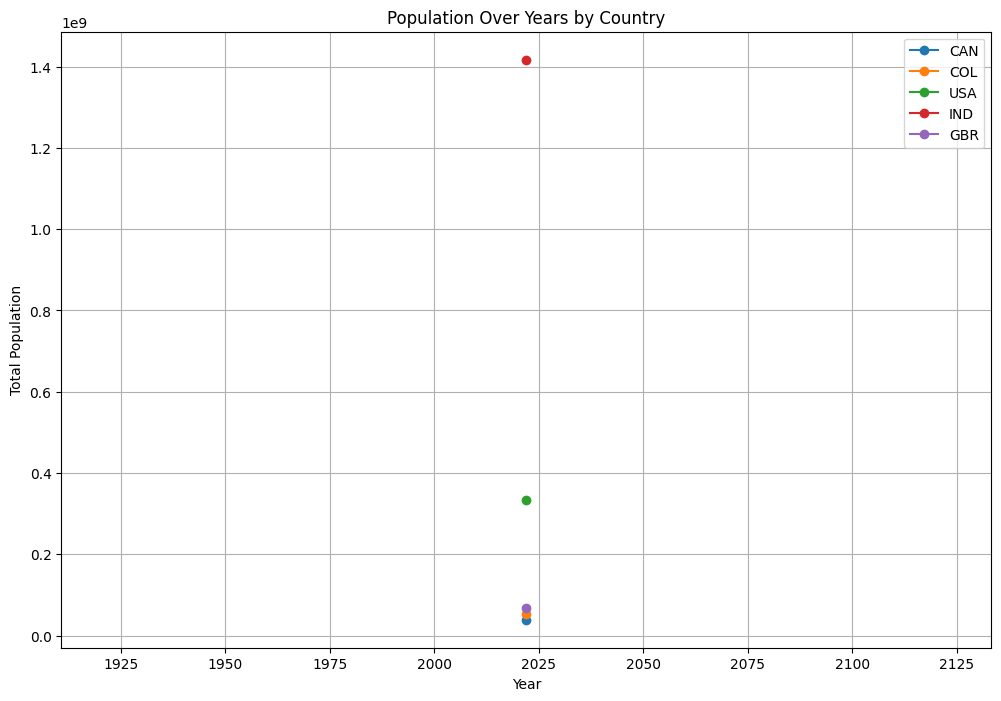

In [32]:
import psycopg2
import matplotlib.pyplot as plt

# Database credentials
db_user = "postgres"
db_password = "Duke#7539"
db_host = "localhost"
db_port = 5432
db_name = "world_data"

# Establish a connection to the PostgreSQL server
connection = psycopg2.connect(user=db_user, password=db_password, host=db_host, port=db_port, database=db_name)

# Create a cursor object to interact with the database
cursor = connection.cursor()

# Fetch data from the "Population" table
cursor.execute("SELECT Last_Updated_Year, Country_Name, Total_Population FROM Population;")
population_data = cursor.fetchall()

# Close the cursor and connection
cursor.close()
connection.close()

# Unpack data for plotting
years, country_names, population_values = zip(*population_data)

# Create a line chart for each country
plt.figure(figsize=(12, 8))
for country_name in set(country_names):
    country_population = [pop for year, name, pop in zip(years, country_names, population_values) if name == country_name]
    plt.plot(years[:len(country_population)], country_population, marker='o', label=country_name)

plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Over Years by Country')
plt.legend()
plt.grid(True)
plt.show()


Gross Domestic Product

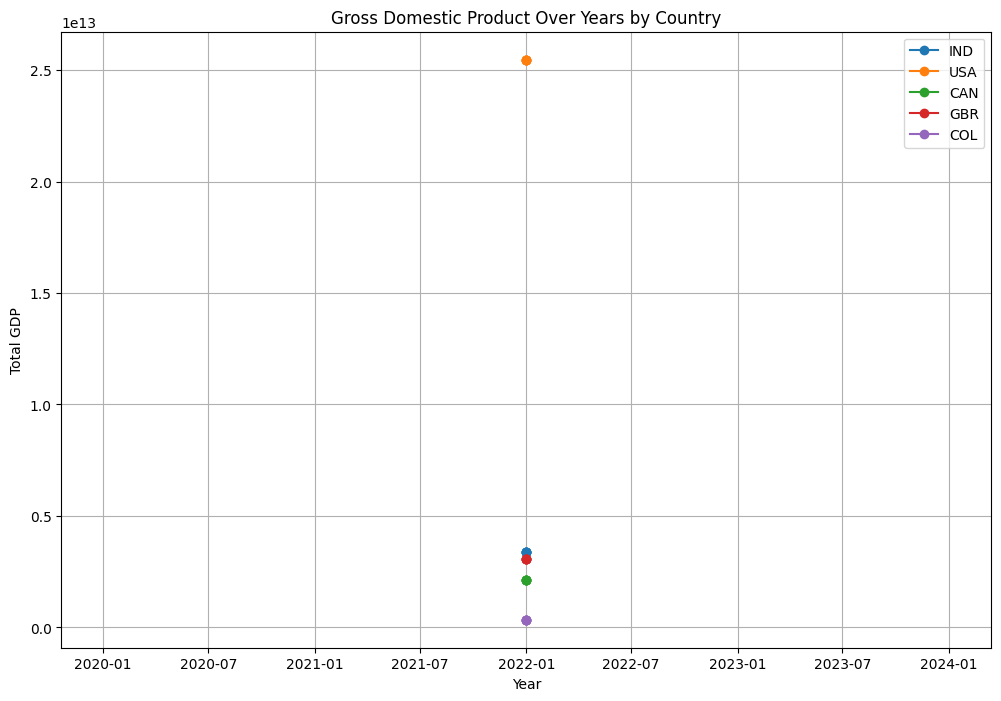

In [47]:
import psycopg2
import matplotlib.pyplot as plt
from datetime import datetime

# Database credentials
db_user = "postgres"
db_password = "Duke#7539"
db_host = "localhost"
db_port = 5432
db_name = "world_data"

# Establish a connection to the PostgreSQL server
connection = psycopg2.connect(user=db_user, password=db_password, host=db_host, port=db_port, database=db_name)

# Create a cursor object to interact with the database
cursor = connection.cursor()

# Fetch data from the "Population" table
cursor.execute("SELECT country_name FROM Population;")
population_data = cursor.fetchall()

# Fetch data from the "Gross_Domestic_Product" table
cursor.execute("SELECT last_updated, total_gdp FROM Gross_Domestic_Product;")
gdp_data = cursor.fetchall()

# Close the cursor and connection
cursor.close()
connection.close()

# Unpack data for plotting
population_names = [row[0] for row in population_data]
gdp_last_updated = [datetime.strptime(str(row[0]), '%Y') for row in gdp_data]
gdp_values = [row[1] for row in gdp_data]

# Plotting using matplotlib
plt.figure(figsize=(12, 8))

for country, gdp_value in zip(population_names, gdp_values):
    plt.plot(gdp_last_updated, [gdp_value]*len(gdp_last_updated), marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Total GDP')
plt.title('Gross Domestic Product Over Years by Country')
plt.legend()
plt.grid(True)
plt.show()


Gross National Income

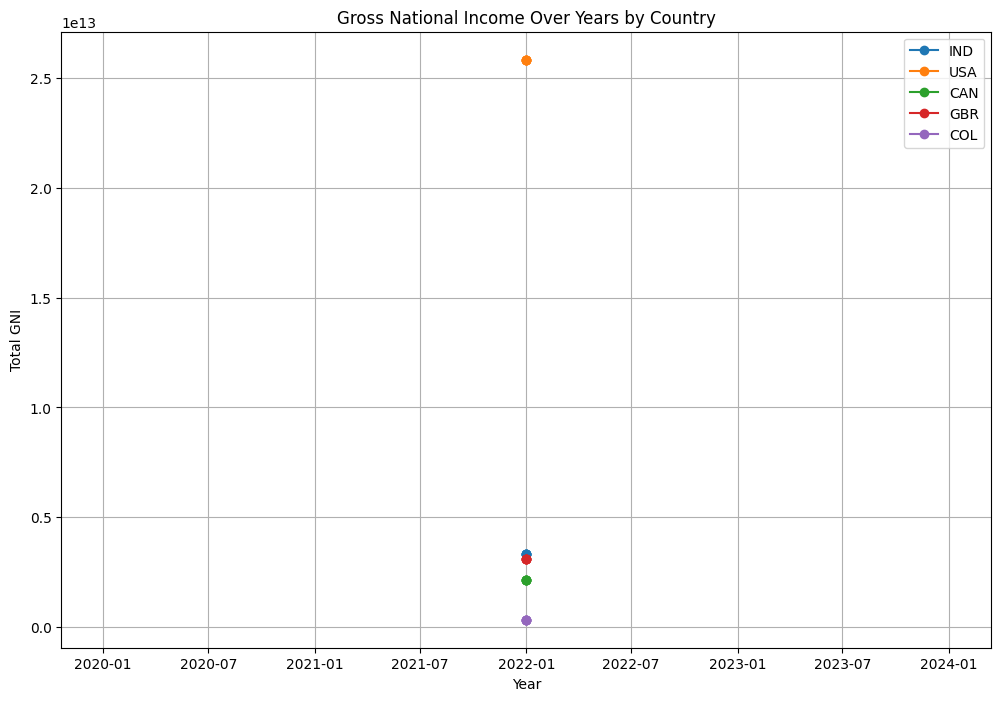

In [49]:
import psycopg2
import matplotlib.pyplot as plt
from datetime import datetime

# Database credentials
db_user = "postgres"
db_password = "Duke#7539"
db_host = "localhost"
db_port = 5432
db_name = "world_data"

# Establish a connection to the PostgreSQL server
connection = psycopg2.connect(user=db_user, password=db_password, host=db_host, port=db_port, database=db_name)

# Create a cursor object to interact with the database
cursor = connection.cursor()

# Fetch data from the "Population" table
cursor.execute("SELECT country_name FROM Population;")
population_data = cursor.fetchall()

# Fetch data from the "Gross_National_Income" table
cursor.execute("SELECT last_updated, total_gni FROM Gross_National_Income;")
gni_data = cursor.fetchall()

# Close the cursor and connection
cursor.close()
connection.close()

# Unpack data for plotting
population_names = [row[0] for row in population_data]
gni_last_updated = [datetime.strptime(str(row[0]), '%Y') for row in gni_data]
gni_values = [row[1] for row in gni_data]

# Plotting using matplotlib
plt.figure(figsize=(12, 8))

for country, gni_value in zip(population_names, gni_values):
    plt.plot(gni_last_updated, [gni_value]*len(gni_last_updated), marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Total GNI')
plt.title('Gross National Income Over Years by Country')
plt.legend()
plt.grid(True)
plt.show()


Inflation Rates 

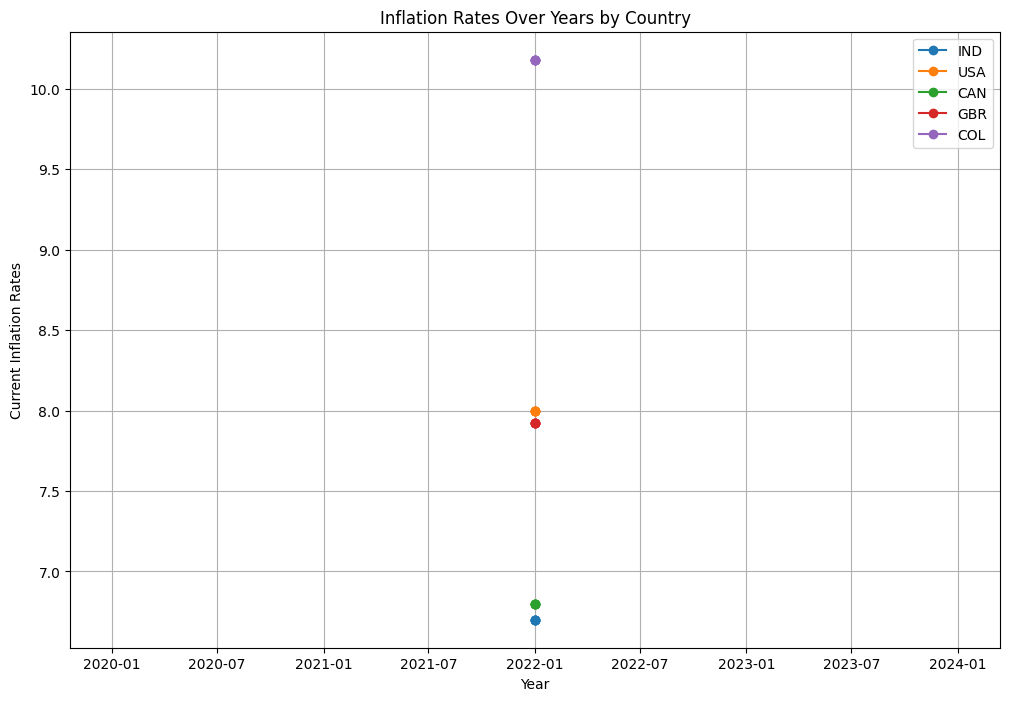

In [45]:
import psycopg2
import matplotlib.pyplot as plt
from datetime import datetime

# Database credentials
db_user = "postgres"
db_password = "Duke#7539"
db_host = "localhost"
db_port = 5432
db_name = "world_data"

# Establish a connection to the PostgreSQL server
connection = psycopg2.connect(user=db_user, password=db_password, host=db_host, port=db_port, database=db_name)

# Create a cursor object to interact with the database
cursor = connection.cursor()

# Fetch data from the "Population" table
cursor.execute("SELECT country_name FROM Population;")
population_data = cursor.fetchall()

# Fetch data from the "Inflation_Rates" table
cursor.execute("SELECT current_inflation_rates, last_updated FROM Inflation_Rates;")
inflation_data = cursor.fetchall()

# Close the cursor and connection
cursor.close()
connection.close()

# Unpack and organize the data
population_names = [row[0] for row in population_data]
inflation_rates = [row[0] for row in inflation_data]
last_updated_dates = [datetime.strptime(str(row[1]), '%Y') for row in inflation_data]

# Plotting using matplotlib
plt.figure(figsize=(12, 8))

for country, inflation_rate in zip(population_names, inflation_rates):
    plt.plot(last_updated_dates, [inflation_rate]*len(last_updated_dates), marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Current Inflation Rates')
plt.title('Inflation Rates Over Years by Country')
plt.legend()
plt.grid(True)
plt.show()
